In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import tensorflow as tf
import tensorflow_probability as tfp

from statsmodels.tsa.stattools import adfuller


In [2]:
print(tf.__version__)
print(tfp.__version__)

2.12.0
0.19.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/Nam3-hk2/BA/bsts/data/XOM.csv", header = 0, 
    index_col = 0,
    parse_dates = True)

In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,83.820000,85.199997,83.660004,85.029999,64.879845,11469300
2018-01-03,85.160004,86.970001,84.820000,86.699997,66.154083,13957700
2018-01-04,86.790001,87.220001,86.430000,86.820000,66.245667,10863000
2018-01-05,86.750000,86.879997,85.709999,86.750000,66.192230,11047600
2018-01-08,86.699997,87.150002,86.599998,87.139999,66.489830,10927100
2018-01-09,86.940002,87.150002,86.650002,86.769997,66.207489,8131600
2018-01-10,87.000000,87.190002,85.980003,86.080002,65.681007,10822300
2018-01-11,86.360001,87.370003,85.930000,86.930000,66.329590,14366000
2018-01-12,87.199997,87.989998,87.180000,87.519997,66.779762,9834500


<Axes: title={'center': 'Bitcoin Close Price'}, xlabel='Date'>

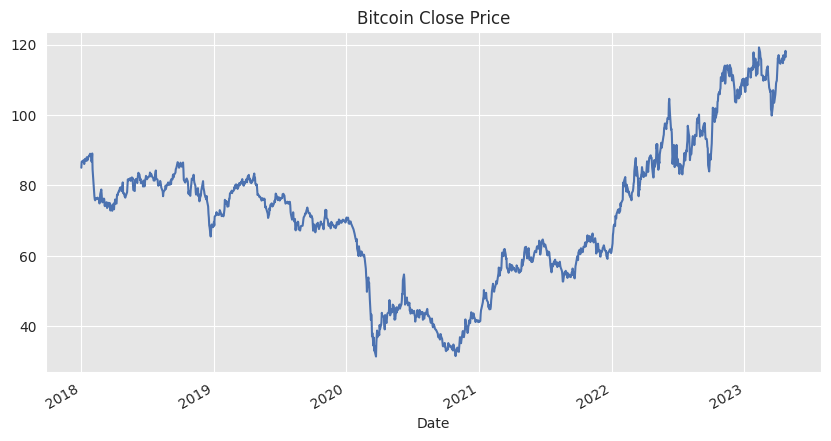

In [6]:
# Plot data
df['Close'].plot(figsize=(10, 5), title='Bitcoin Close Price')

In [7]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


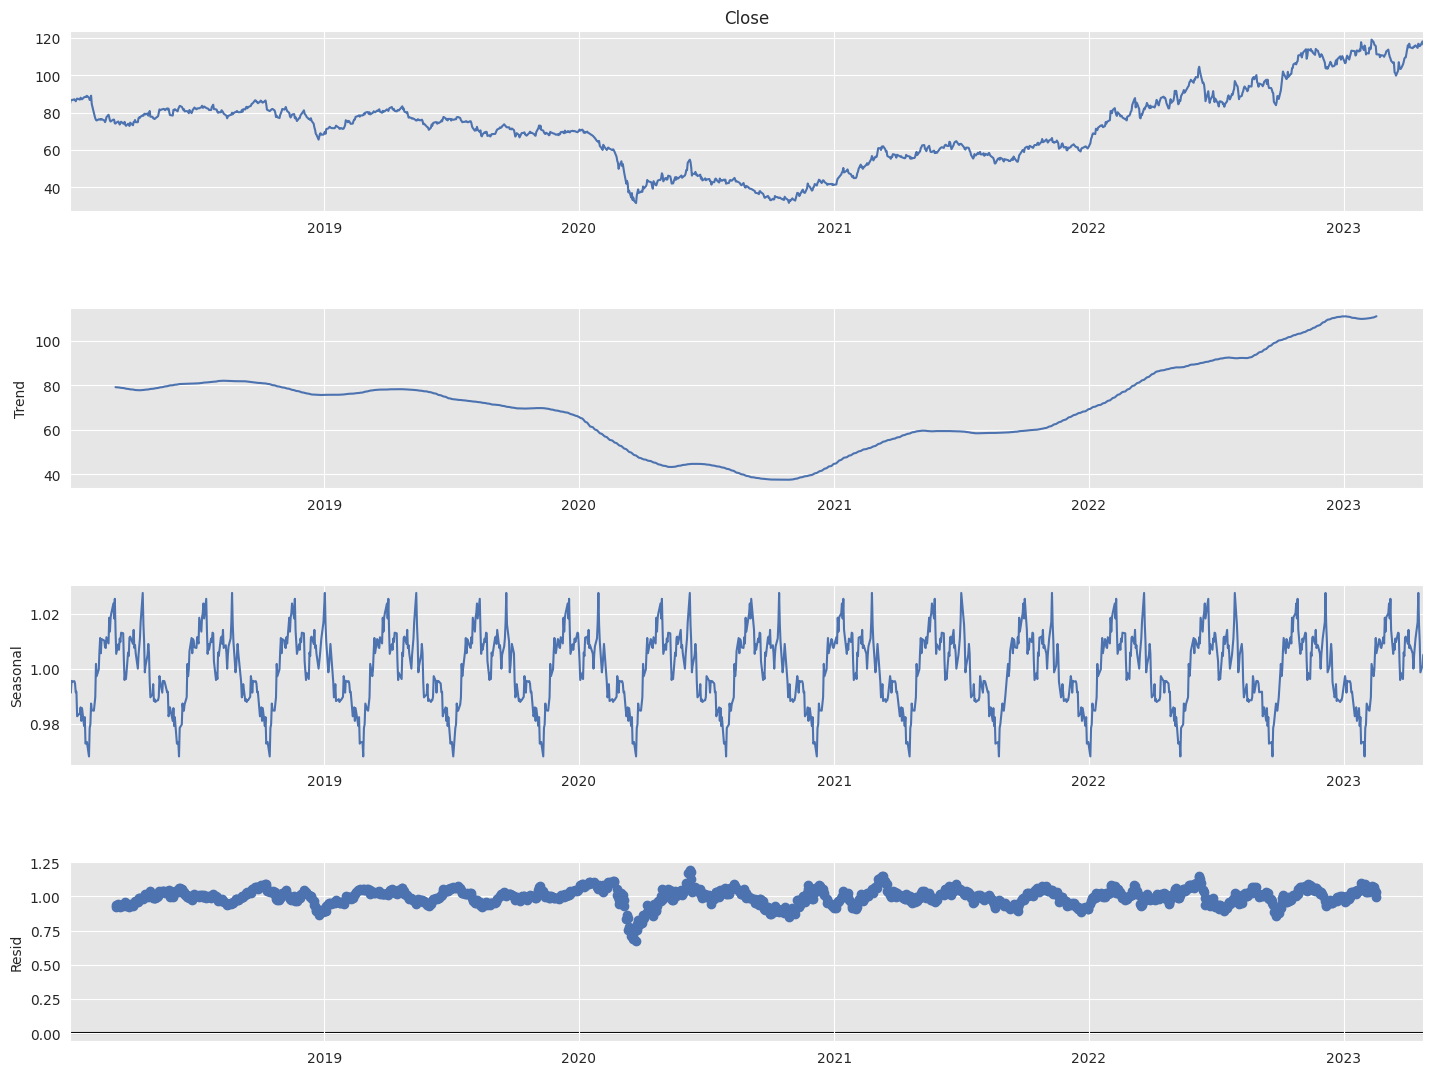

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'],model='multiplicative',period=90)
fig = result.plot()
fig.set_size_inches(16,12)

In [9]:
n = df.shape[0]


In [10]:
# Split data into train, validation, and test sets
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.1)
test_size = len(df) - train_size - val_size
train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size+val_size]
test_data = df.iloc[train_size+val_size:]

In [11]:
threshold_date_val = df.index[train_size]
threshold_date_test = df.index[train_size + val_size]

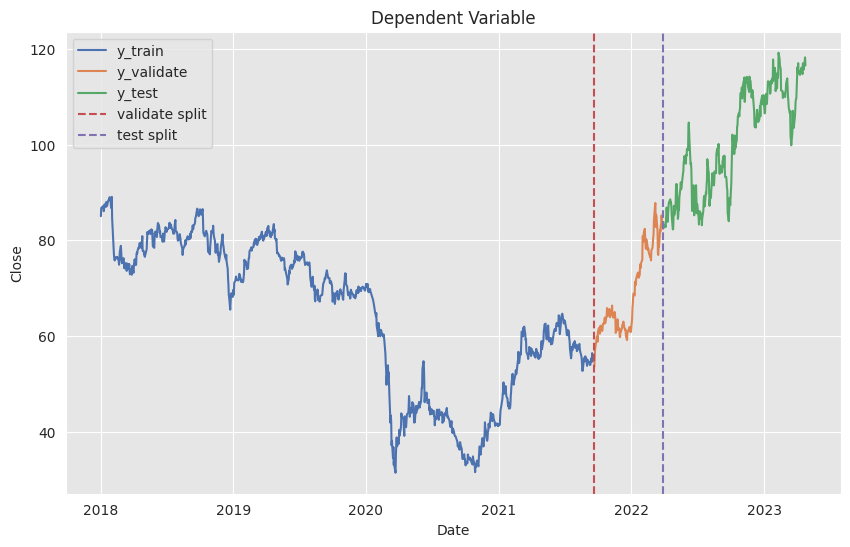

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.lineplot(x=train_data.index, y='Close', label='y_train', data=train_data, ax=ax)
sns.lineplot(x=val_data.index, y='Close', label='y_validate', data=val_data, ax=ax)
sns.lineplot(x=test_data.index, y='Close', label='y_test', data=test_data, ax=ax)
ax.axvline(threshold_date_val, color=sns_c[3], linestyle='--', label='validate split')
ax.axvline(threshold_date_test, color=sns_c[4], linestyle='--', label='test split')
ax.legend(loc='upper left')
ax.set(title='Dependent Variable');


[Text(0.5, 1.0, 'Dependent Variable - Smoothing'), Text(0, 0.5, 'y')]

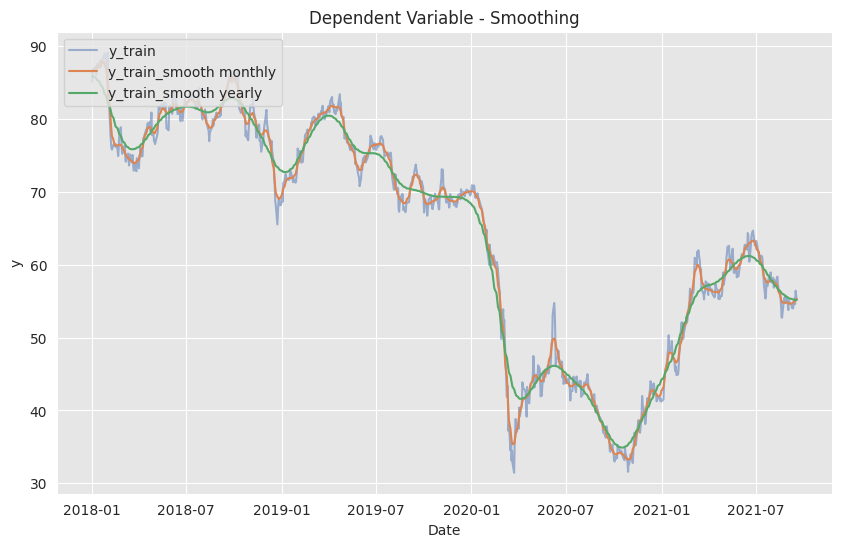

In [13]:
from scipy.ndimage import gaussian_filter

df_smooth = train_data \
    .assign(y_smooth_1 = lambda x: gaussian_filter(input=x['Close'], sigma=3.5)) \
    .assign(y_smooth_2 = lambda x: gaussian_filter(input=x['Close'], sigma=15)) \

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.lineplot(x=df_smooth.index, y='Close', label='y_train', data=df_smooth, alpha=0.5, ax=ax)
sns.lineplot(x=df_smooth.index, y='y_smooth_1', label='y_train_smooth monthly', data=df_smooth, ax=ax)
sns.lineplot(x=df_smooth.index, y='y_smooth_2', label='y_train_smooth yearly', data=df_smooth, ax=ax)
ax.legend(loc='upper left')
ax.set(title='Dependent Variable - Smoothing', ylabel='y')

In [14]:
result = adfuller(df['Close'].dropna())
print(f'ADF statistic : {result[0]}')
print(f'p-value : {result[1]}')

ADF statistic : -0.3777994168419675
p-value : 0.9137400129600473


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


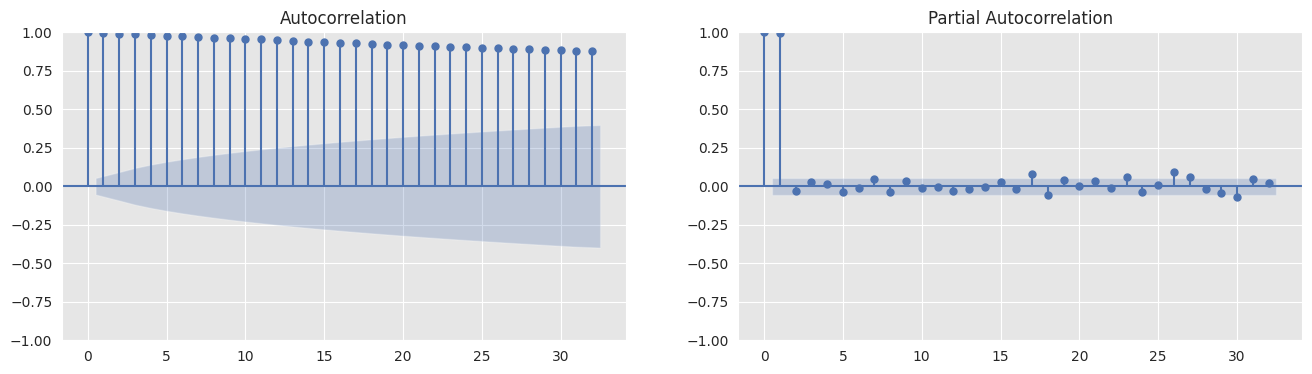

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(16,4))
plot_acf(x=df['Close'], ax=ax[0])
plot_pacf(x=df['Close'], ax=ax[1]);

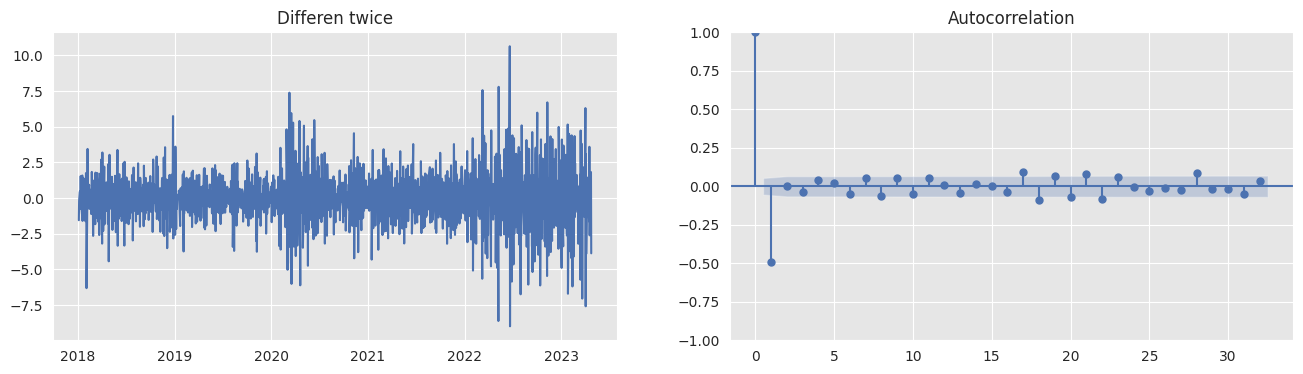

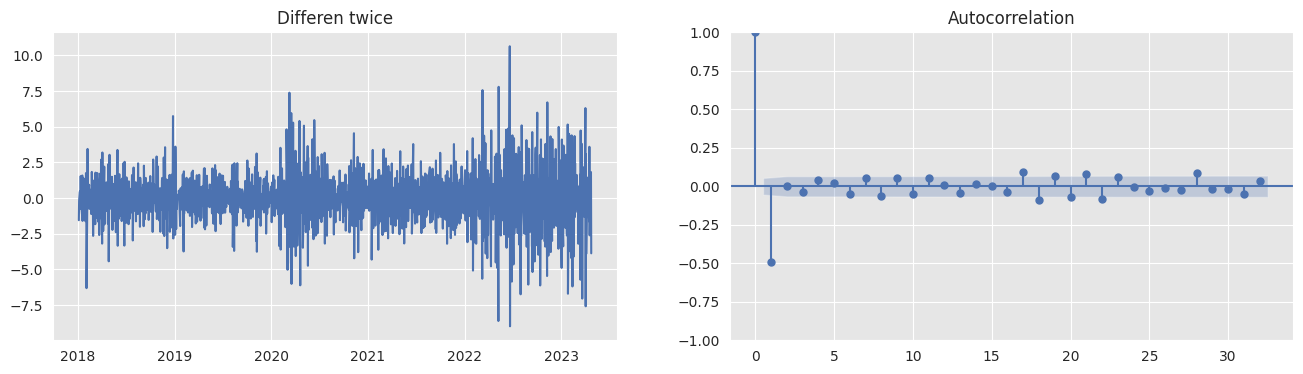

In [17]:
diff=df['Close'].diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differen twice")
plot_acf(diff,ax=ax2)

In [19]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00


In [20]:
from pmdarima.arima.utils import ndiffs

In [21]:
ndiffs(df['Close'],test='adf')

1

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


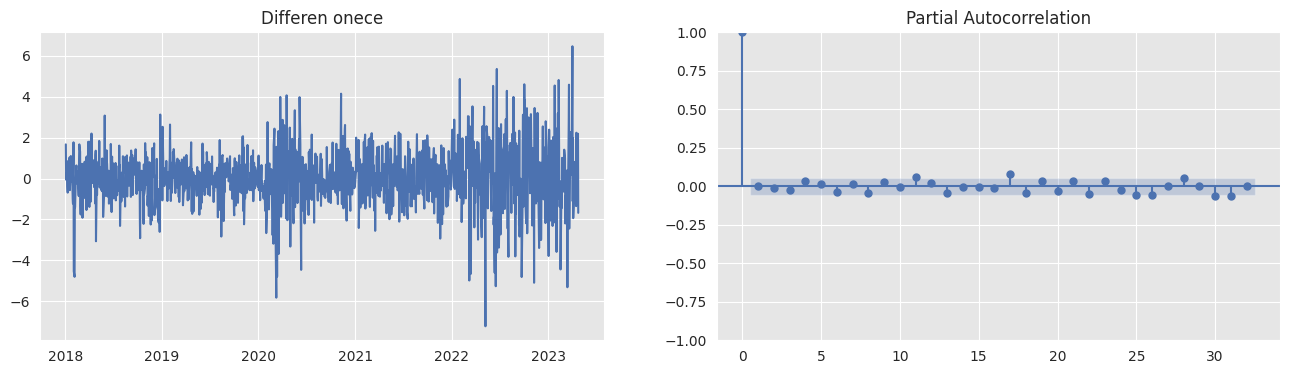

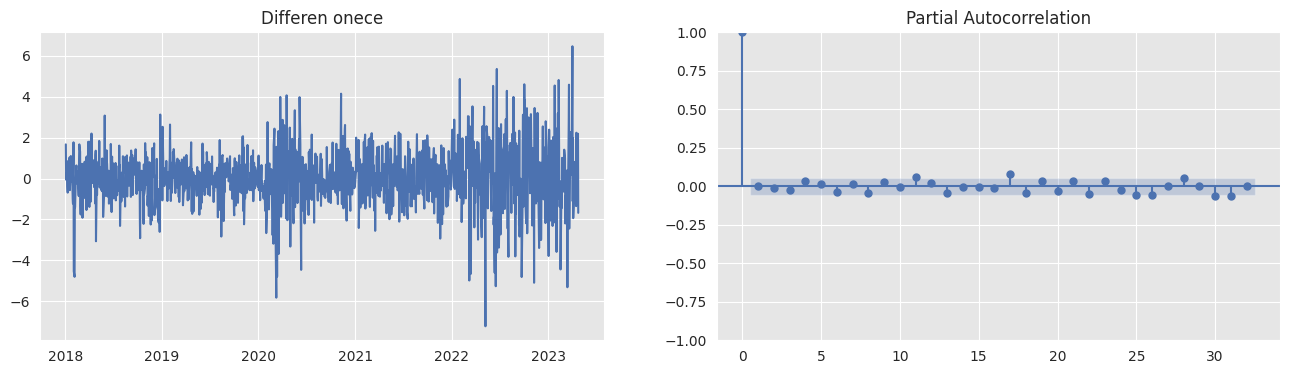

In [23]:
#p
diff=df['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differen onece")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2)

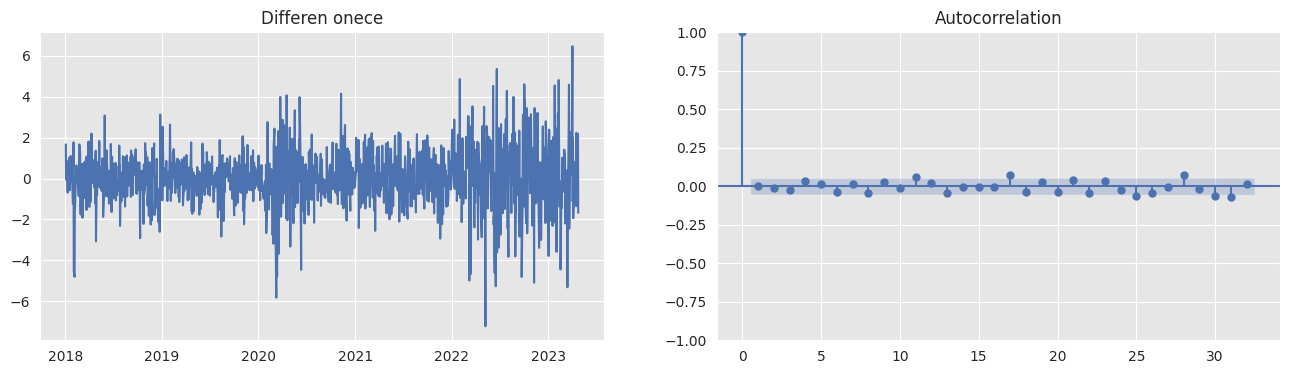

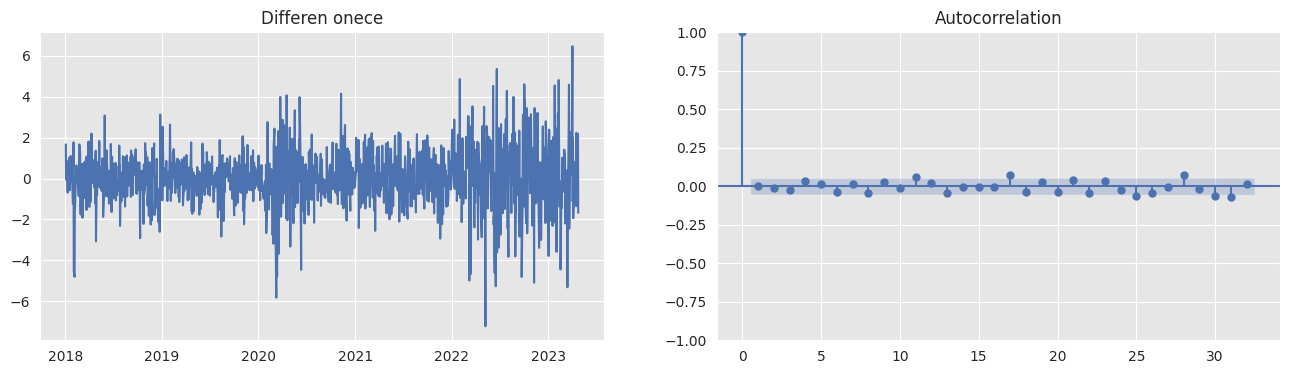

In [24]:
#p
diff=df['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differen onece")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2)

In [25]:
from datetime import datetime, timedelta

# get the last date in the dataset
last_date = df.index[-1]

# calculate the start and end dates for the new date range
start_date = last_date + timedelta(days=1)
end_date = start_date + timedelta(days=29)
date_range_future = pd.date_range(start=start_date, end=end_date, freq='D')

In [26]:
date_range_future

DatetimeIndex(['2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05', '2023-05-06', '2023-05-07',
               '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11',
               '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15',
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25'],
              dtype='datetime64[ns]', freq='D')

In [37]:
# Define BSTS models
p,d,q = 0,1,0
_train = tfp.sts.regularize_series(train_data['Close'])
def arima_model():
    level = tfp.sts.AutoregressiveIntegratedMovingAverage(
        ar_order = p,
        ma_order = q,
        integration_degree = d,
        observed_time_series=_train,
        name='level')
    model = tfp.sts.Sum([level],
                        observed_time_series=_train,
                        name='armia_model')
    return model

In [38]:
def state_space_model():
    level = tfp.sts.LocalLevel(
        observed_time_series=_train,
        name='level')
    seasonal = tfp.sts.Seasonal(
        num_seasons=12,
        observed_time_series=_train,
        name='seasonal')
    model = tfp.sts.Sum([level, seasonal],
                        observed_time_series=_train,
                        name='sts_model')
    return model

def local_level_model():
    level = tfp.sts.LocalLevel(
        observed_time_series=_train,
        name='local_level')
    return level

def local_linear_trend_model():
    trend = tfp.sts.LocalLinearTrend(
        observed_time_series=_train,
        name='local_trend')
    return trend

def seasonal_state_model():
    seasonal = tfp.sts.Seasonal(
        num_seasons=12,
        observed_time_series=_train,
        name='seasonal')
    return seasonal


In [28]:
def semi_local_linear_trend_model():
    trend = tfp.sts.SemiLocalLinearTrend(
        observed_time_series=_train,
        name='semi_local')
    return trend

In [39]:
# Define function to train and test model
def train_and_test_model(model_fn, model_name):
    # Build model
    model = model_fn()
    _train = tfp.sts.regularize_series(train_data['Close'])
    # Fit model
    num_variational_steps = 500
    num_optimizer_steps = 2000

    surrogate_posterior = tfp.sts.build_factored_surrogate_posterior(
        model=model)

    optimizer = tf.optimizers.Adam(learning_rate=0.1)

    @tf.function(experimental_compile=True)
    def train():
        elbo_loss_curve = tfp.vi.fit_surrogate_posterior(
            target_log_prob_fn=model.joint_log_prob(observed_time_series=_train),
            surrogate_posterior=surrogate_posterior,
            optimizer=optimizer,
            num_steps=num_optimizer_steps)
        return elbo_loss_curve

    elbo_loss_curve = train()
        # Generate forecasts
    forecast_dist = tfp.sts.forecast(
        model,
        observed_time_series=_train,
        parameter_samples=surrogate_posterior.sample(50),
        num_steps_forecast=val_size + test_size +30)

    forecast_mean, forecast_scale, forecast_samples = (
        forecast_dist.mean().numpy()[..., 0],
        forecast_dist.stddev().numpy()[..., 0],
        forecast_dist.sample(100).numpy()[..., 0])

        # Compute MAE and plot results
    val_forecast = forecast_samples[:, :val_size]
    val_close_forecast = np.median(val_forecast, axis=0)
    mae = np.abs(val_close_forecast - val_data['Close'].iloc[-1]).mean()
    print(f'{model_name} validation MAE: {mae:.2f}')
    
    mse = ((val_close_forecast - val_data['Close'].iloc[-1])**2).mean()
    rmse = np.sqrt(mse)
    print(f'{model_name} validation RMSE: {rmse:.2f}')

    test_forecast = forecast_samples[:, val_size:val_size+test_size]
    test_close_forecast = np.median(test_forecast, axis=0)
    mae = np.abs(test_close_forecast - test_data['Close'].iloc[-1]).mean()
    print(f'{model_name} test MAE: {mae:.2f}')

    mse = ((test_close_forecast - test_data['Close'].iloc[-1])**2).mean()
    rmse = np.sqrt(mse)
    print(f'{model_name} test RMSE: {rmse:.2f}')

    future_forecast = forecast_samples[:,val_size+test_size:]
    future_close_forecast = np.median(future_forecast, axis=0)

    
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='data')
    plt.plot(val_data.index, val_close_forecast, label='validation forecast')
    plt.plot(test_data.index, test_close_forecast, label='test forecast')
    plt.plot(date_range_future, future_close_forecast, label='future forecast')
    plt.fill_between(val_data.index,
                    np.percentile(val_forecast, 10, axis=0)[-1],
                    np.percentile(val_forecast, 90, axis=0)[-1],
                    alpha=0.2)
    plt.fill_between(test_data.index,
                    np.percentile(test_forecast, 10, axis=0)[-1],
                    np.percentile(test_forecast, 90, axis=0)[-1],
                    alpha=0.2)
    plt.legend()
    plt.title(model_name)
    plt.show()

armia_model validation MAE: 27.63
armia_model validation RMSE: 27.63
armia_model test MAE: 63.94
armia_model test RMSE: 63.95


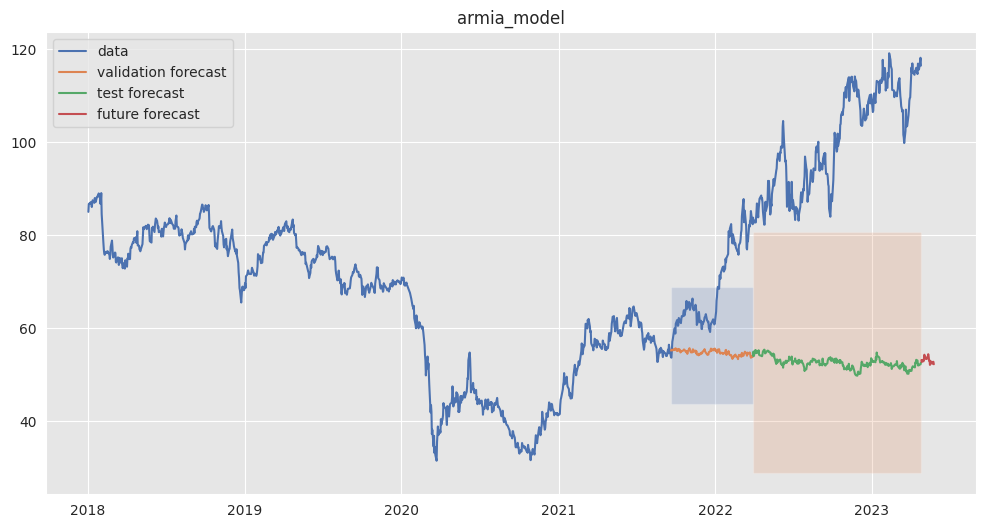

In [41]:
train_and_test_model(arima_model, 'armia_model')


Semi-Local Linear Trend validation MAE: 27.23
Semi-Local Linear Trend validation RMSE: 27.24
Semi-Local Linear Trend test MAE: 63.22
Semi-Local Linear Trend test RMSE: 63.23


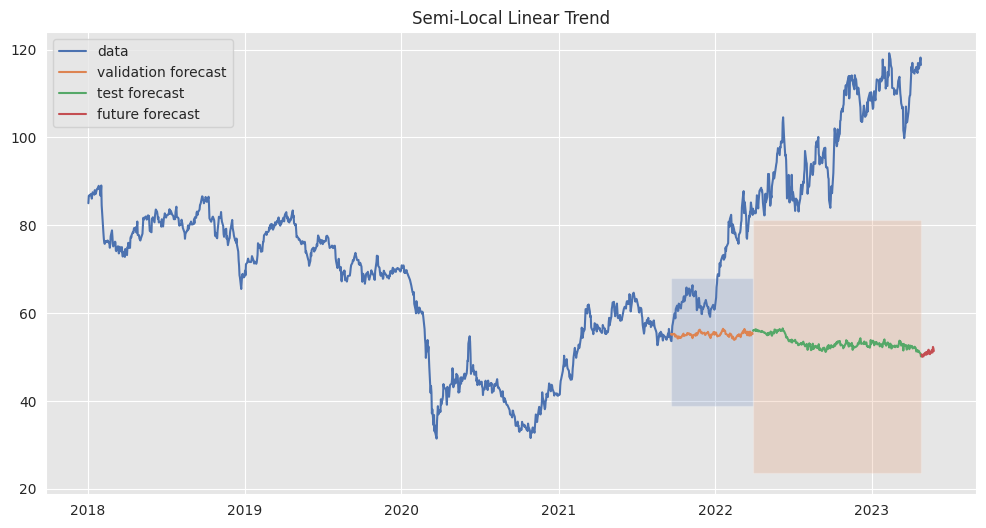

In [35]:
train_and_test_model(semi_local_linear_trend_model, 'Semi-Local Linear Trend')

Local Level validation MAE: 27.44
Local Level validation RMSE: 27.45
Local Level test MAE: 61.05
Local Level test RMSE: 61.07


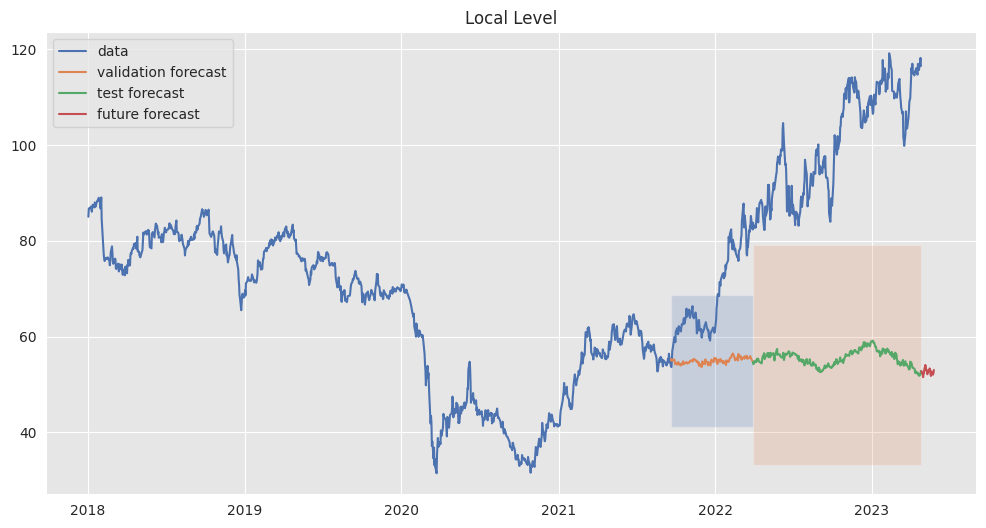

Local Linear Trend validation MAE: 28.44
Local Linear Trend validation RMSE: 28.45
Local Linear Trend test MAE: 68.23
Local Linear Trend test RMSE: 68.27


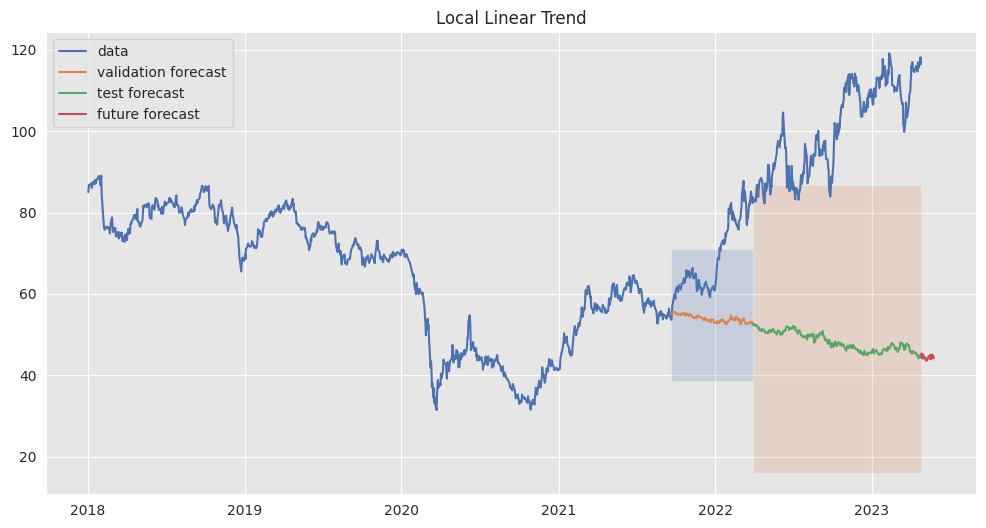

Seasonal State validation MAE: 88.71
Seasonal State validation RMSE: 116.86
Seasonal State test MAE: 126.66
Seasonal State test RMSE: 161.96


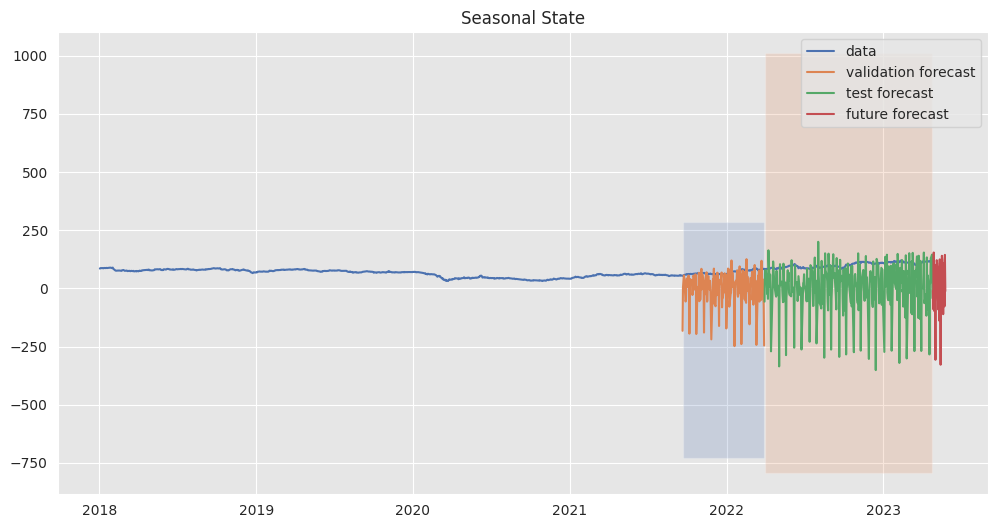

In [42]:
# Train and test the BSTS models
train_and_test_model(local_level_model, 'Local Level')
train_and_test_model(local_linear_trend_model, 'Local Linear Trend')
train_and_test_model(seasonal_state_model, 'Seasonal State')